In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In this notebook, we will explore factors that impacted Saleprice of Ames houses. The goal is to make sense of provided Ames Housing dataset and turn these insights to predict the House Prices using Advanced regression techniques like random forest and gradient boosting.
What I have done in this notebook is:
1. Understanding the problem 
2. Study of the Independent and Dependent variable
3. Data Cleaning 
4. Creating the Regression Model
5. Prediction

# 1. NoteBook-Importing data and Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
import warnings

warnings.filterwarnings("ignore")
sns.set()
np.set_printoptions(threshold=sys.maxsize)

**Import the training and testing datasets**

In [3]:
#Training Dataset
pd.set_option("max_columns",None)
train_data=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Testing Dataset
pd.set_option("max_columns",None)
test_data=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#description of the data
description_data=open("../input/house-prices-advanced-regression-techniques/data_description.txt",'r')
print(description_data.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [6]:
#Analyse the the Columns
train_data.columns   

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. PLOT THE CORRELATION MATRIX OF HEAT MAP STYLE 

#### To find out which independent variables correlates with the salesprice(dependent variable)

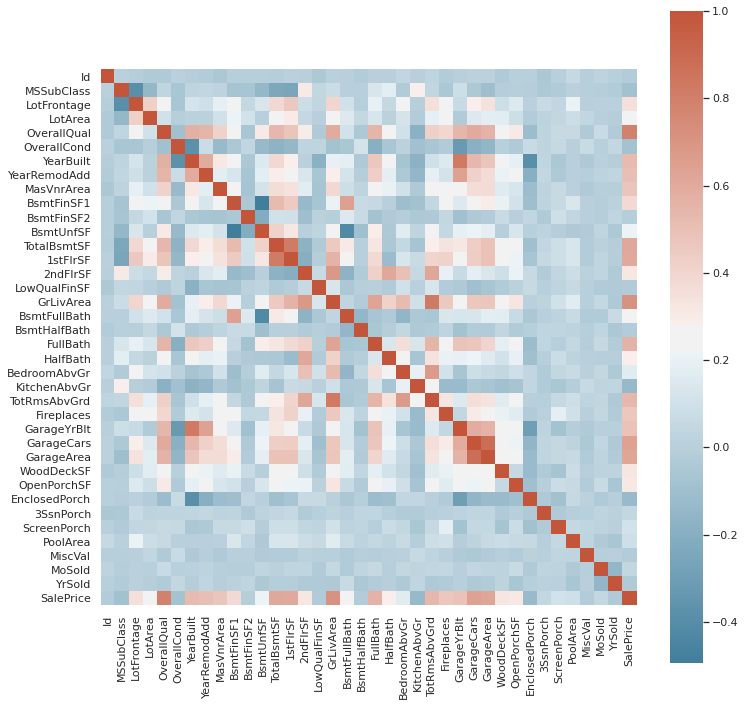

In [7]:
corr_mat=train_data.corr() 
cmap = sns.diverging_palette(230, 20, as_cmap=True) #custom diverging colormap
f,ax =plt.subplots(figsize=(12,12)) #figSize
sns.heatmap(corr_mat,cmap=cmap,cbar=True, xticklabels=corr_mat.columns,yticklabels=corr_mat.columns,square=True,vmax=1)

From the heatmap above we can see that ***Overallqual, Glivarea , garagecars , garagearea, totalbsmntsf,1stFirSf***,  correlates the most with the ***SalePrice***. We can also see that ***yearbuilt, FullBath*** can also be considered as the potential independent variable for obtaining predictions. To get the clear picture about these independent variable, let's zoom in the heatmap and add the annotations. We are trying to get the top 10 variables who strongly corelates with the 'SalePrice'.  

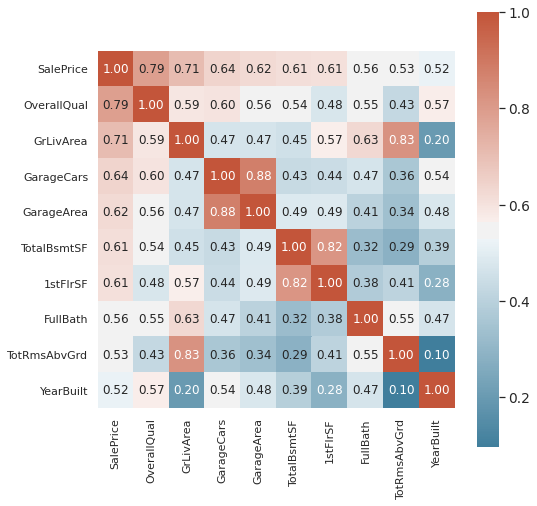

In [8]:
k = 10 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
corrm = np.corrcoef(train_data[cols].values.T)
f1,ax1 =plt.subplots(figsize=(8,8))
sns.set(font_scale=1.25)
hm = sns.heatmap(corrm, cmap=cmap,cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

From the above heatmap(zoomed style), OverallQual, Glivarea , garagecars , garagearea, totalbsmntsf, 1stFlrSF,'FullBath', TotRmsAbvGrd,Yearbuilt are strong correlations with SalePrice.  

# 3.Study of the dependent variable-SalePrice 

We have to predict the Saleprice of the house and hence it is highly recommended to study the main focus of the notebook.

In [9]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

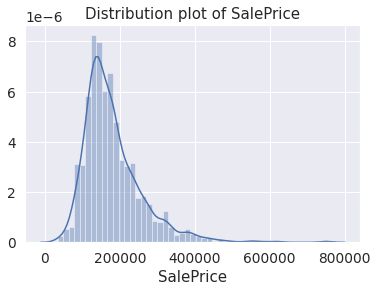

In [10]:
#plot the distribution plot
sns.distplot(train_data['SalePrice'])
plt.title('Distribution plot of SalePrice') 
plt.xlabel('SalePrice') # add x-label
plt.show()

In [11]:
#skewness and Kurtosis
print('Skewness: ', train_data['SalePrice'].skew())
print('Kurtosis: ',train_data['SalePrice'].kurt())

Skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


Since Kurtosis is greater than 3 its Leptokurtic in nature which means outliers are present. 

## 4. Studying the relationship between the dependent and independent variable as per the heatmap

'SalePrice' is the independent variable. 
'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'YearBuilt','GarageArea','1stFlrSF','FullBath','TotRmsAbvGrd'
are the Dependent variables. Here, we are plotting the Scatter,box,line plots to get clear understanding of the variation of the independent variables with respect  to the SalePrice. 

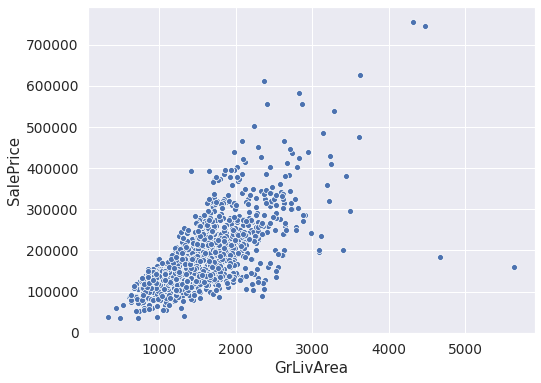

In [12]:
#GrLivArea
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=train_data,x='GrLivArea',y='SalePrice')

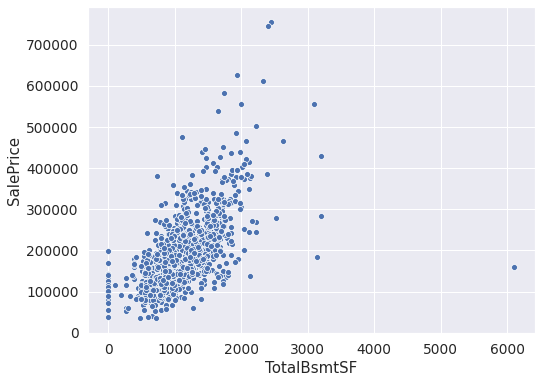

In [13]:
#TotalBsmtSF
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=train_data,x='TotalBsmtSF',y='SalePrice')

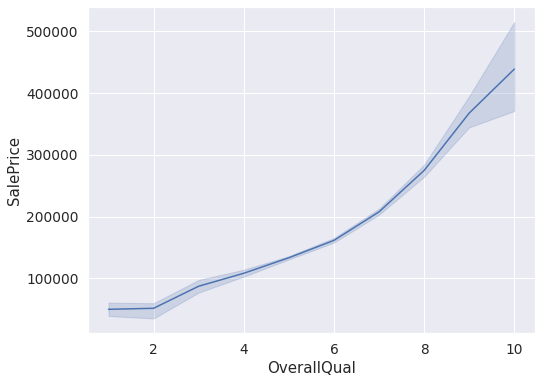

In [14]:
#OverallQual
f, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(data=train_data,x='OverallQual',y='SalePrice')

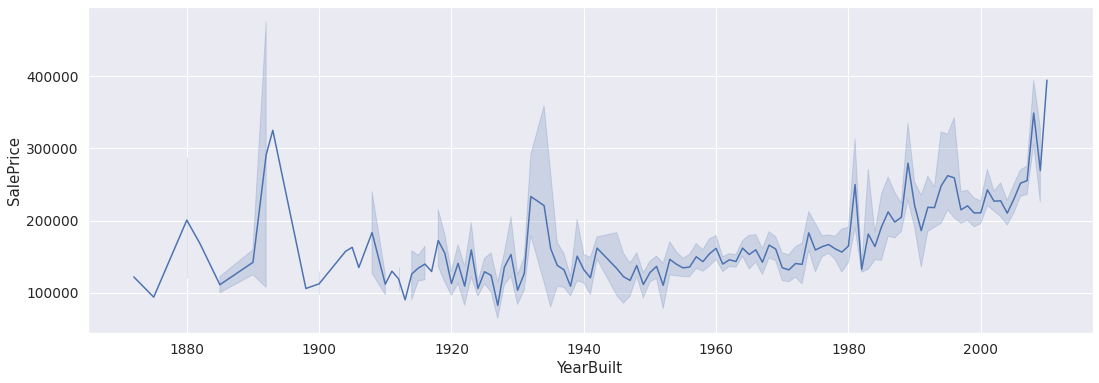

In [15]:
#YearBuilt
f, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=train_data,x='YearBuilt',y='SalePrice')

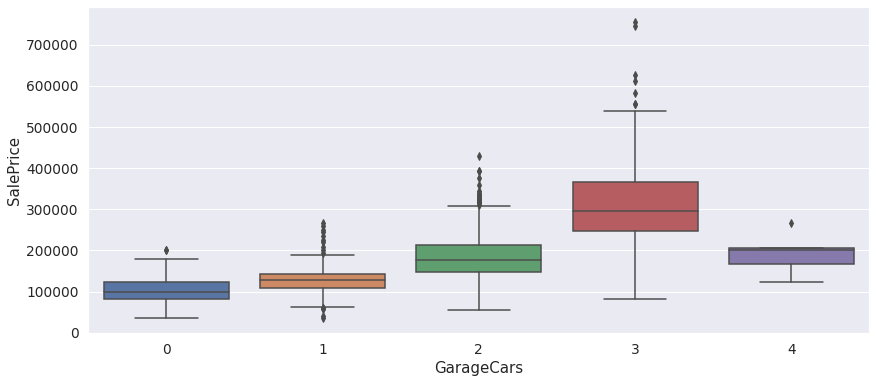

In [16]:
#GarageCars
f, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(data=train_data,x='GarageCars',y='SalePrice')

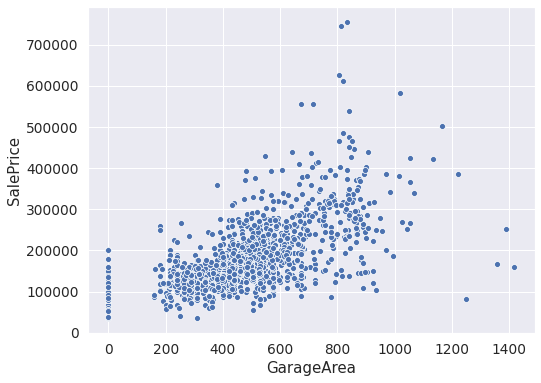

In [17]:
#GarageArea
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=train_data,x='GarageArea',y='SalePrice')

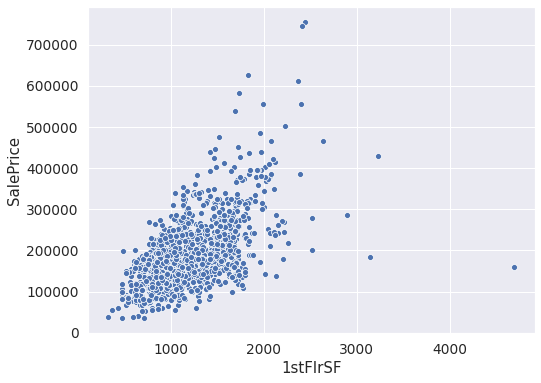

In [18]:
#1stFlrSF
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=train_data,x='1stFlrSF',y='SalePrice')

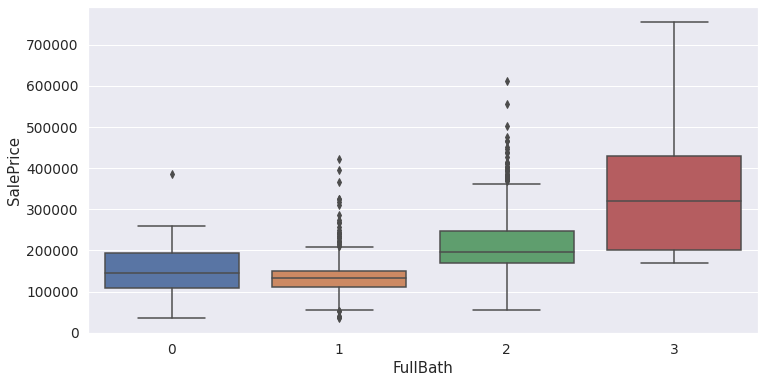

In [19]:
#Fullbath
f, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=train_data,x='FullBath',y='SalePrice')

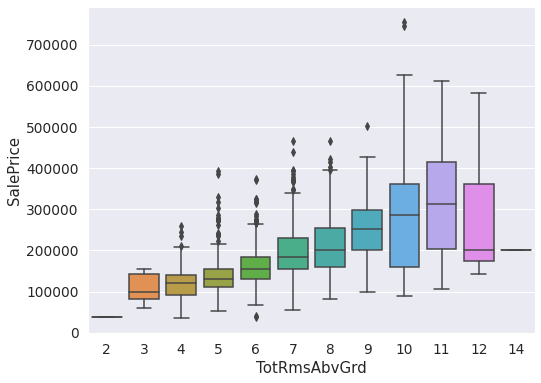

In [20]:
#TotRmsAbvGrd
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=train_data,x='TotRmsAbvGrd',y='SalePrice')

# 5. Data Cleaning - Handling Missing Data

Here comes the most important and time consuming step Data Cleaning. Missing Data is like the cavity in the data and its presence could be harmful while training the model. Hence we are removing the entire variable as per the following types,
* Type 1: Variables which are not generally considered while buying the house.
* Type 2: Variables that are not good enough to influence the SalePrice(as per HeatMap Analysis)
* Type 3: Variables whose data is already described in any other Variable 


In [21]:
#For Train Data Set 
total = train_data.isnull().sum().sort_values(ascending=False)
percent=(train_data.isnull().sum()/len(train_data)*100).sort_values(ascending=False)
miss_data=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_data.head(25)

,Total_Null,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [22]:
train_data.shape

(1460, 81)

In [23]:
#Dropping Missing Data where percentage > 2 as well those belong to Type 1,Type 2,Type 3
train=train_data.drop((miss_data[miss_data['Percent']>2]).index,1)

In [24]:
train.shape

(1460, 65)

In [25]:
#These Belong to Type1 and Type2
train.drop('MasVnrArea',axis=1,inplace=True)
train.drop('MasVnrType',axis=1,inplace=True)

In [26]:
train.shape

(1460, 63)

In [27]:
# Since only one Value is missing as for now lets delete that row only 
train=train.drop(train[train['Electrical'].isnull()].index)

In [28]:
train.shape

(1459, 63)

In [29]:
# Check for any missing Values
if train.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


In [30]:
train.shape

(1459, 63)

## 5. Removing all unwanted Variables as per **Type1,Type2,Type3** 

In [31]:
numcols= [col for col in train.columns 
          if train[col].dtype in ['int64','float64']]
catcols= [col for col in train.columns 
          if train[col].dtype in ['object']]


In [32]:
print(numcols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [33]:
print(catcols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [34]:
train.drop(catcols,axis=1,inplace=True) # Since all the catcols belong to either of Type1,Type2,Type3
train.shape

(1459, 35)

In [35]:
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


### Now, lets remove all the numerical variables as per the Types: Type1,Type2,Type3

In [36]:
var=['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageArea','BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
train.drop(var,axis=1,inplace=True)

In [37]:
train.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice
0,7,2003,856,856,1710,2,8,2,208500
1,6,1976,1262,1262,1262,2,6,2,181500
2,7,2001,920,920,1786,2,6,2,223500
3,7,1915,756,961,1717,1,7,3,140000
4,8,2000,1145,1145,2198,2,9,3,250000


In [38]:
train.shape

(1459, 9)

In [39]:
#for Test data set 

In [40]:
#For Train Data Set 
total = test_data.isnull().sum().sort_values(ascending=False)
percent=(test_data.isnull().sum()/len(test_data)*100).sort_values(ascending=False)
miss_test_data=pd.concat([total,percent],axis=1,keys=['Total_Null','Percent'])
miss_test_data.head(40)

,Total_Null,Percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


In [41]:
test=test_data.drop((miss_test_data[miss_test_data['Total_Null']>1]).index,1)
test.shape


(1459, 57)

In [42]:
test.columns

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [43]:
vari=['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallCond',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'LowQualFinSF', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
test.drop(vari,axis=1,inplace=True)

In [44]:
test.shape

(1459, 9)

In [45]:
test.drop('GarageArea',axis=1,inplace=True) # Since it belongs to Type 3

In [46]:
test.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
0,5,1961,882.0,896,896,1,5,1.0
1,6,1958,1329.0,1329,1329,1,6,1.0
2,5,1997,928.0,928,1629,2,6,2.0
3,6,1998,926.0,926,1604,2,7,2.0
4,8,1992,1280.0,1280,1280,2,5,2.0


In [47]:
test['GarageCars'].fillna(value = test['GarageCars'].median(),inplace = True)
test['TotalBsmtSF'].fillna(value = test['TotalBsmtSF'].median(),inplace = True)



In [48]:
test.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars
0,5,1961,882.0,896,896,1,5,1.0
1,6,1958,1329.0,1329,1329,1,6,1.0
2,5,1997,928.0,928,1629,2,6,2.0
3,6,1998,926.0,926,1604,2,7,2.0
4,8,1992,1280.0,1280,1280,2,5,2.0


In [49]:
test.shape

(1459, 8)

In [50]:
# Check any missing Values
if test.isnull().sum().max()>0:
    print("Missing Values")
else:
    print('No Missing Values')

No Missing Values


# 6. Outliers

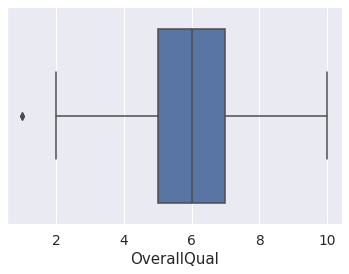

In [51]:
sns.boxplot(train['OverallQual'])

In [52]:
train.drop(train[train['OverallQual'] < 2].index, axis = 0, inplace = True)

In [53]:
train.shape

(1457, 9)

In [54]:
#Here we are modifying the YearBuilt to YearOld  
train['YearOld']=2020-train['YearBuilt']
train.drop('YearBuilt',axis=1,inplace=True)
train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,YearOld
0,7,856,856,1710,2,8,2,208500,17
1,6,1262,1262,1262,2,6,2,181500,44
2,7,920,920,1786,2,6,2,223500,19
3,7,756,961,1717,1,7,3,140000,105
4,8,1145,1145,2198,2,9,3,250000,20


In [55]:
test['YearOld']=2020-test['YearBuilt']
test.drop('YearBuilt',axis=1,inplace=True)
test.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld
0,5,882.0,896,896,1,5,1.0,59
1,6,1329.0,1329,1329,1,6,1.0,62
2,5,928.0,928,1629,2,6,2.0,23
3,6,926.0,926,1604,2,7,2.0,22
4,8,1280.0,1280,1280,2,5,2.0,28


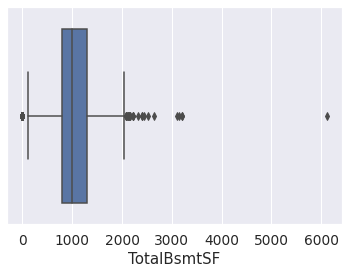

In [56]:
sns.boxplot(train['TotalBsmtSF'])

In [57]:
train.drop(train[train['TotalBsmtSF'] > 3500].index, axis = 0, inplace = True)
train.shape

(1456, 9)

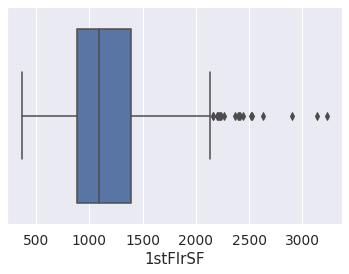

In [58]:
sns.boxplot(train['1stFlrSF'])

In [59]:
train.drop(train[train['1stFlrSF'] > 2500].index, axis = 0, inplace = True)
train.shape

(1450, 9)

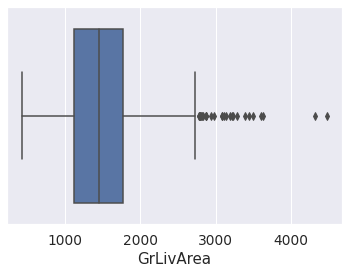

In [60]:
sns.boxplot(train['GrLivArea'])

In [61]:
train.drop(train[train['GrLivArea'] > 4000].index, axis = 0, inplace = True)
train.shape

(1448, 9)

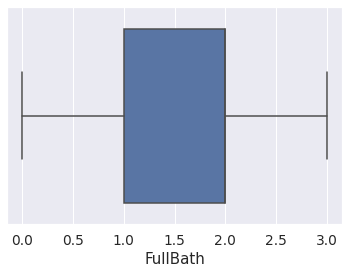

In [62]:
sns.boxplot(train['FullBath'])
#No outlier

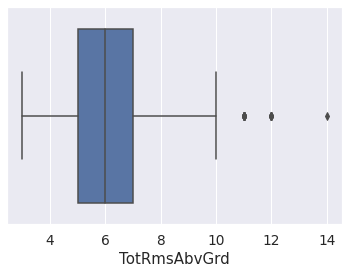

In [63]:
sns.boxplot(train['TotRmsAbvGrd'])

In [64]:
train.drop(train[train['TotRmsAbvGrd'] > 11].index, axis = 0, inplace = True)
train.shape

(1437, 9)

In [65]:
train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,SalePrice,YearOld
0,7,856,856,1710,2,8,2,208500,17
1,6,1262,1262,1262,2,6,2,181500,44
2,7,920,920,1786,2,6,2,223500,19
3,7,756,961,1717,1,7,3,140000,105
4,8,1145,1145,2198,2,9,3,250000,20


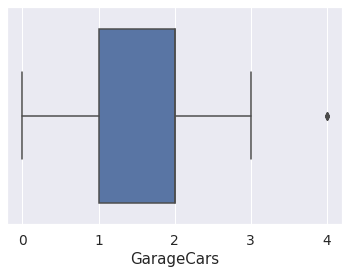

In [66]:
sns.boxplot(train['GarageCars'])

In [67]:
train.drop(train[train['GarageCars'] > 3.5].index, axis = 0, inplace = True)
train.shape

(1433, 9)

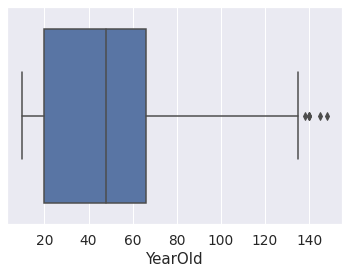

In [68]:
sns.boxplot(train['YearOld'])

In [69]:
train.drop(train[train['YearOld'] > 145].index, axis = 0, inplace = True)
train.shape

(1432, 9)

In [70]:
#Now no Outliers are present

In [71]:
train=train.reindex(columns=['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'YearOld','SalePrice'])
#train.head()
train.shape

(1432, 9)

# 7: Scaling the data

In [72]:
train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld,SalePrice
0,7,856,856,1710,2,8,2,17,208500
1,6,1262,1262,1262,2,6,2,44,181500
2,7,920,920,1786,2,6,2,19,223500
3,7,756,961,1717,1,7,3,105,140000
4,8,1145,1145,2198,2,9,3,20,250000


In [73]:
test.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld
0,5,882.0,896,896,1,5,1.0,59
1,6,1329.0,1329,1329,1,6,1.0,62
2,5,928.0,928,1629,2,6,2.0,23
3,6,926.0,926,1604,2,7,2.0,22
4,8,1280.0,1280,1280,2,5,2.0,28


In [74]:
xtrain=train.drop('SalePrice',axis=1)
xtrain.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld
0,7,856,856,1710,2,8,2,17
1,6,1262,1262,1262,2,6,2,44
2,7,920,920,1786,2,6,2,19
3,7,756,961,1717,1,7,3,105
4,8,1145,1145,2198,2,9,3,20


In [75]:
ytrain=train['SalePrice']

In [76]:
xtest=test

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
xtrain[:] = scaler.fit_transform(xtrain[:])

In [79]:
xtest[:] = scaler.fit_transform(xtest[:])

In [80]:
xtrain.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld
0,0.677710,-0.472196,-0.823898,0.459048,0.824879,1.010966,0.331986,-1.054298
1,-0.064248,0.536704,0.313750,-0.483812,0.824879,-0.297988,0.331986,-0.153609
2,0.677710,-0.313157,-0.644564,0.618997,0.824879,-0.297988,0.331986,-0.987580
3,0.677710,-0.720693,-0.529678,0.473780,-1.026573,0.356489,1.702026,1.881280
4,1.419669,0.245962,-0.014095,1.486092,0.824879,1.665442,1.702026,-0.954221


In [81]:
xtest.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,YearOld
0,-0.751101,-0.370716,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,0.340945
1,-0.054877,0.639230,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,0.439695
2,-0.751101,-0.266784,-0.574165,0.294508,0.773083,-0.255371,0.301406,-0.844059
3,-0.054877,-0.271303,-0.579190,0.243004,0.773083,0.407593,0.301406,-0.876976
4,1.337571,0.528520,0.310192,-0.424487,0.773083,-0.918335,0.301406,-0.679475


# 9. Model

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# Running RFE with the output number of the variable equal to 35
lm = LinearRegression()
lm.fit(xtrain, ytrain)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(xtrain, ytrain)

In [83]:
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('OverallQual', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('FullBath', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('GarageCars', True, 1),
 ('YearOld', True, 1)]

In [84]:
#RFE has taken it all 

In [85]:
# Columns selected by RFE
cols = xtrain.columns[rfe.support_]
cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'GarageCars', 'YearOld'],
      dtype='object')

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)

In [87]:
rfreg.fit(xtrain[cols],ytrain)


RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [88]:
yhat=rfreg.predict(xtest[cols])

In [89]:
finaloutput = pd.DataFrame({'Id': test_data.Id,'SalePrice':yhat})
finaloutput.head(15)

,Id,SalePrice
0,1461,122849.599227
1,1462,145586.331754
2,1463,153426.026958
3,1464,179199.258975
4,1465,211334.851909
5,1466,179129.997675
6,1467,151234.383832
7,1468,176334.332905
8,1469,184161.894920
9,1470,113050.850971


In [90]:
finaloutput.to_csv('submission.csv',index = False)